## Project: "Navigating Success in the Google Play Store - A Strategic Analysis for App Developers"
made by: Pawel Wiezel \
LinkedIn: https://www.linkedin.com/in/pawelwiezel/

## 1. Intro
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, your task is to do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You have to look for insights in the data to devise strategies to drive growth and retention.

### Dataset
This dataset consists of web scraped data of more than 10,000 Google Play Store apps and 60,000 app reviews.
- apps_data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app such as category, number of installs and price.
- review_data.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

### Scenario
- You are working for an app developer. 
- They are in the process of brainstorming a new app. 
- They want to ensure that their next app scores a high review on the app store, as this can lead to the app being featured on the store homepage. 
- They would like you analyze what factors increase the rating an app will receive. 
- They would also like to know what impact reviews have on the final score.

### Questions to answer
- Which categories get the highest reviews from amongst the 10 most popular categories?
- Create a plot visualizing the distribution of sentiment polarity, split by content rating.
- What impact does the content rating an app receives have on its sentiment and rating?

[Source](https://www.kaggle.com/lava18/google-play-store-apps) of dataset.

## Data Dictionary

**apps_data.csv**

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| App            | character | The application name                                                         |
| Category       | character | The category the app belongs to                                              |
| Rating         | numeric   | Overall user rating of the app                                               |
| Reviews        | numeric   | Number of user reviews for the app                                           |
| Size           | character | The size of the app                                                          |
| Installs       | character | Number of user installs for the app                                          |
| Type           | character | Either "Paid" or "Free"                                                      |
| Price          | character | Price of the app                                                             |
| Content Rating | character | The age group the app is targeted at - "Children" / "Mature 21+" / "Adult"   |
| Genres         | character | Possibly multiple genres the app belongs to                                  |
| Last Updated   | character | The date the app was last updated                                            |
| Current Ver    | character | The current version of the app                                               |
| Android Ver    | character | The Android version needed for this app                                      |

**review_data.csv**

| variable               | class        | description                                           |
|:-----------------------|:-------------|:------------------------------------------------------|
| App                    | character    | The application name                                  |
| Translated_Review      | character    | User review (translated to English)                   |
| Sentiment              | character    | The sentiment of the user - Positive/Negative/Neutral |
| Sentiment_Polarity     | character    | The sentiment polarity score                          |
| Sentiment_Subjectivity | character    | The sentiment subjectivity score                      |

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np

apps_data = pd.read_csv("apps_data.csv")
review_data = pd.read_csv('review_data.csv')

In [2]:
# Reviewing the dataset
display(apps_data.shape)
apps_data

(10841, 13)

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[10841 rows x 13 columns]

In [3]:
# Reviewing the dataset
display(review_data.shape)
review_data.head(10)

(64295, 5)

App  ... Sentiment_Subjectivity
0  10 Best Foods for You  ...               0.533333
1  10 Best Foods for You  ...               0.288462
2  10 Best Foods for You  ...                    NaN
3  10 Best Foods for You  ...               0.875000
4  10 Best Foods for You  ...               0.300000
5  10 Best Foods for You  ...               0.300000
6  10 Best Foods for You  ...               0.900000
7  10 Best Foods for You  ...                    NaN
8  10 Best Foods for You  ...               0.000000
9  10 Best Foods for You  ...               0.000000

[10 rows x 5 columns]

## 2. Data cleaning
Some entries in the columns "Installs" and "Price" have special characters ("+", ",", "$"). 
This prevents the columns from being numeric, making it difficult to use them in mathematical calculations. 
We want these columns to contain only digits.
Some rows in Size column contain "Varies with device", which is not a numeric value and it cannot be used for the further analysis, so there entries must be removed.
It is also profitable to make sure, that there are no duplicate rows.

In [4]:
# Removing NULL values from the "Rating" column
apps_data = apps_data[apps_data['Rating'] <=5]

# Checking the rows number after removing NULL values
display(apps_data.shape)

# Reviewing the dataset
apps_data

(9366, 13)

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[9366 rows x 13 columns]

In [5]:
# Removing the duplicate rows
apps_data=apps_data.drop_duplicates()

# Reviewing the row number
display(apps_data.shape)

(8892, 13)

Row count remains the same (8892) - there were no duplicates left

In [6]:
apps_data["Size"] = apps_data["Size"].replace("Varies with device", float("NaN"))

In [7]:
# Defining the column names to clean
col_to_mod = ["Installs", "Price"]

# Defining the characters to remove from the dataset
char_to_mod=["+", ",", "$"]

In [8]:
# Iterating over defined columns
for col in col_to_mod:
    # Iterating over defined characters in the column
    for char in char_to_mod:
        # Replacing the character with an empty string
        apps_data[col] = apps_data[col].apply(lambda x: x.replace(char, ""))
        
# Printing a summary of the dataframe
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            7424 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.6+ KB


## 3. Correcting data types
Previous step revealed, that Installs and Price were categorized as object data type, not int or float as we would like. This is because these two columns originally had mixed input types (digits and special characters).

For the next steps we need to make sure, that Installs, Size, Rating and Price columns contain numeric values.

In [9]:
# Convert Installs to float data type
apps_data["Installs"] = apps_data["Installs"].astype("float")

# Convert Price to float data type
apps_data["Price"] = apps_data["Price"].astype("float")

# Modify Size column
apps_data["Size"] = apps_data["Size"].str.replace("M", "").str.replace("k", "")
apps_data["Size"] = apps_data["Size"].astype("float") * 0.1

# Checking dtypes of the apps dataframe
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            7424 non-null   float64
 5   Installs        8892 non-null   float64
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(4), object(9)
memory usage: 972.6+ KB


Installs, Size, Rating and Price columns are now of float type.

In [10]:
# Check how does the apps_data look like after modification
apps_data

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[8892 rows x 13 columns]

## 4. Exploring app categories
For companies to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Store. For this purpose Google allows grouping apps into categories.

In this context following questions would be usefull to answer:
- Which category has the highest share of active apps in the market?
- Is any specific category dominating the market?
- Which categories have the fewest number of apps?

In [11]:
# Number of unique categories
num_categories = apps_data["Category"].nunique()
num_categories

33

In [12]:
# Number of apps in each category
num_apps_in_category = apps_data["Category"].value_counts()
num_apps_in_category.sort_values(ascending=False)

FAMILY                 1718
GAME                   1074
TOOLS                   734
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         310
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [13]:
# Reset index to create a DataFrame to be able create a plot with plotly express
num_apps_in_category1 = num_apps_in_category.reset_index()
num_apps_in_category1

index  Category
0                FAMILY      1718
1                  GAME      1074
2                 TOOLS       734
3          PRODUCTIVITY       334
4               FINANCE       317
5       PERSONALIZATION       310
6         COMMUNICATION       307
7             LIFESTYLE       305
8           PHOTOGRAPHY       304
9               MEDICAL       302
10               SPORTS       286
11             BUSINESS       270
12   HEALTH_AND_FITNESS       262
13               SOCIAL       244
14   NEWS_AND_MAGAZINES       214
15     TRAVEL_AND_LOCAL       205
16             SHOPPING       202
17  BOOKS_AND_REFERENCE       177
18        VIDEO_PLAYERS       160
19               DATING       159
20            EDUCATION       129
21  MAPS_AND_NAVIGATION       124
22        ENTERTAINMENT       111
23       FOOD_AND_DRINK       106
24              WEATHER        75
25    AUTO_AND_VEHICLES        73
26       HOUSE_AND_HOME        68
27   LIBRARIES_AND_DEMO        65
28       ART_AND_DESIGN        62
29               COMICS        58
30            PARENTING        50
31               EVENTS        45
32               BEAUTY        42

In [14]:
# Rename the columns
num_apps_in_category1=num_apps_in_category1.rename(columns={"index": "Category", "Category": "Count"})
num_apps_in_category1

Category  Count
0                FAMILY   1718
1                  GAME   1074
2                 TOOLS    734
3          PRODUCTIVITY    334
4               FINANCE    317
5       PERSONALIZATION    310
6         COMMUNICATION    307
7             LIFESTYLE    305
8           PHOTOGRAPHY    304
9               MEDICAL    302
10               SPORTS    286
11             BUSINESS    270
12   HEALTH_AND_FITNESS    262
13               SOCIAL    244
14   NEWS_AND_MAGAZINES    214
15     TRAVEL_AND_LOCAL    205
16             SHOPPING    202
17  BOOKS_AND_REFERENCE    177
18        VIDEO_PLAYERS    160
19               DATING    159
20            EDUCATION    129
21  MAPS_AND_NAVIGATION    124
22        ENTERTAINMENT    111
23       FOOD_AND_DRINK    106
24              WEATHER     75
25    AUTO_AND_VEHICLES     73
26       HOUSE_AND_HOME     68
27   LIBRARIES_AND_DEMO     65
28       ART_AND_DESIGN     62
29               COMICS     58
30            PARENTING     50
31               EVENTS     45
32               BEAUTY     42

In [15]:
#Setting the index to Category column
num_apps_in_category1.set_index("Category")

Count
Category                  
FAMILY                1718
GAME                  1074
TOOLS                  734
PRODUCTIVITY           334
FINANCE                317
PERSONALIZATION        310
COMMUNICATION          307
LIFESTYLE              305
PHOTOGRAPHY            304
MEDICAL                302
SPORTS                 286
BUSINESS               270
HEALTH_AND_FITNESS     262
SOCIAL                 244
NEWS_AND_MAGAZINES     214
TRAVEL_AND_LOCAL       205
SHOPPING               202
BOOKS_AND_REFERENCE    177
VIDEO_PLAYERS          160
DATING                 159
EDUCATION              129
MAPS_AND_NAVIGATION    124
ENTERTAINMENT          111
FOOD_AND_DRINK         106
WEATHER                 75
AUTO_AND_VEHICLES       73
HOUSE_AND_HOME          68
LIBRARIES_AND_DEMO      65
ART_AND_DESIGN          62
COMICS                  58
PARENTING               50
EVENTS                  45
BEAUTY                  42

In [16]:
# Creating a bar chart
fig1 = px.bar(num_apps_in_category1.set_index("Category"), 
              y=num_apps_in_category1["Count"], 
              x=num_apps_in_category1["Category"],
              text=num_apps_in_category1["Count"],
              labels='Count')

fig1.update_layout(
    xaxis_title="Categories",
    yaxis_title="App count",
    xaxis_tickangle=45,
)

# Adjust the layout to make room for the text labels
fig1.update_traces(textposition='outside')

fig1.show()

- There are 33 unique app categories present in the dataset. 
- Family, Game and Tools apps have the highest market prevalence. 
- The apps from Productivity on, have significantly lower app number.
- The lowest app number have apps from Weather on (< 100).

## 5. Distribution of app ratings
After discovering the market share for each category of apps it makes sense to see how all these apps perform, by reviewing the ratings, which are a key performance indicator of an app.

In [17]:
# Calculate the mean ap rating and round it the result to 1 decimal pint
avg_app_rating=apps_data['Rating'].mean().round(1)
print("Mean app rating:",avg_app_rating)

Mean app rating: 4.2


In [18]:
# Distribution of apps according to their ratings
fig3=px.histogram(apps_data, x=apps_data["Rating"])
fig3.update_layout(
    xaxis_title="Rating",
    yaxis_title="App count",
    xaxis_tickangle=45
)
fig3.add_vline(x=avg_app_rating, line_width=2, line_dash="dash", line_color="red")
fig3

The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

## 6. Size and price of an app
Now it is resonable to examine app size and app price influence on the rating. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Long download times could turn users off before they even open the app. Additionally, mobile phones have a finite amount of disk space. Some users also expect apps to be free or inexpensive.

In [19]:
# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps_data[(apps_data["Rating"].notna()) & (apps_data["Size"].notna())]

In [20]:
# Subset for categories with at least 250 apps, to reduce the influence of the categories with the lower market share
apps_over_250 = num_apps_in_category[num_apps_in_category >= 250]
large_categories = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Category"].isin(apps_over_250.index)]

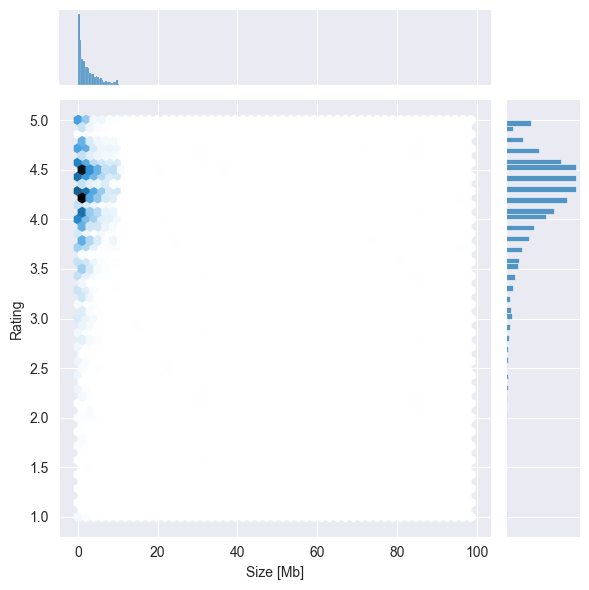

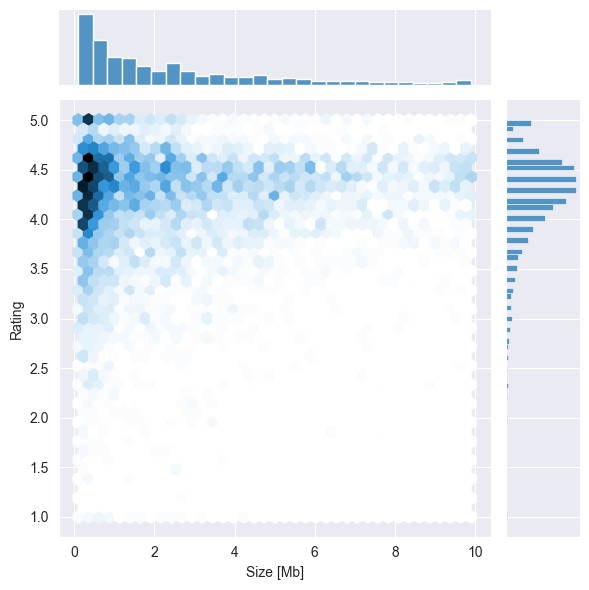

In [21]:
import seaborn as sns
# Setting the grid style
sns.set_style("darkgrid")

# Plot size vs. rating
plt1 = sns.jointplot(x=large_categories["Size"], y=large_categories["Rating"], kind="hex")

# Reduce the x-axis range to remove extreme results which prevent us from analysing the majority of the results
plt2 = sns.jointplot(x=large_categories[large_categories["Size"] < 10]["Size"], y=large_categories["Rating"], kind="hex")

# Change x-axis title to "Size [Mb]" for both plots
plt1.set_axis_labels("Size [Mb]", "Rating")
plt2.set_axis_labels("Size [Mb]", "Rating")

In [22]:
# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

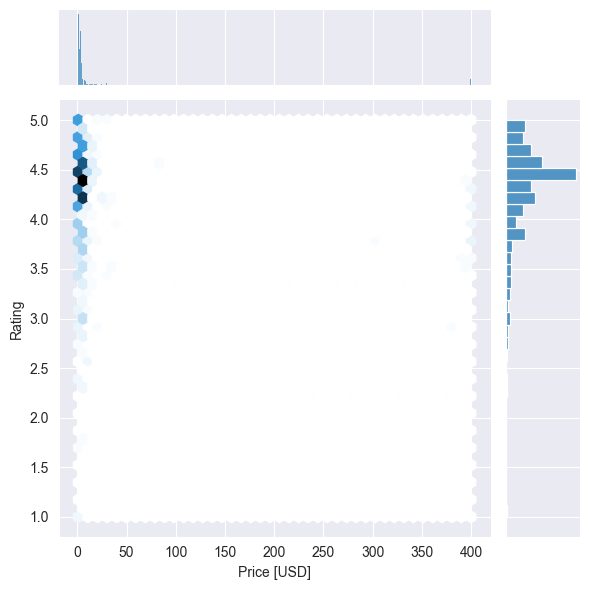

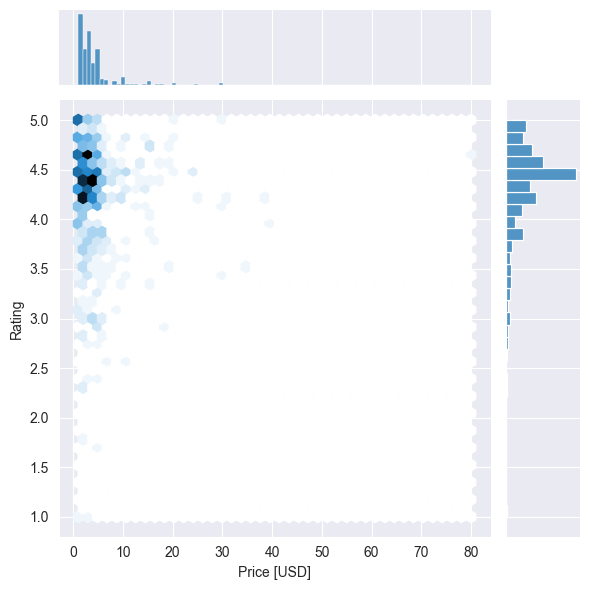

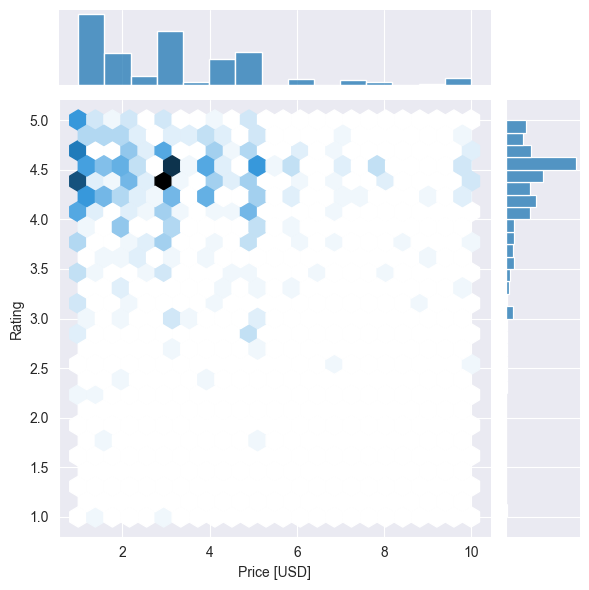

In [23]:
# Plot price vs. rating
plt3 = sns.jointplot(x=paid_apps["Price"], y=paid_apps["Rating"], kind="hex")

# Reduce the x-axis range to remove extreme results which prevent us from analysing the majority of the results
plt4 = sns.jointplot(x=paid_apps[paid_apps["Price"] < 100]["Price"], y=paid_apps["Rating"], kind="hex")

plt5 = sns.jointplot(x=paid_apps[paid_apps["Price"] < 10]["Price"], y=paid_apps["Rating"], kind="hex")

# Change x-axis title to "Price [USD]" for both plots
plt3.set_axis_labels("Price [USD]", "Rating")
plt4.set_axis_labels("Price [USD]", "Rating")
plt5.set_axis_labels("Price [USD]", "Rating")

In [24]:
# Reviewing the dataset
large_categories

App  ...         Android Ver
190                                 ADP Mobile Solutions  ...          5.0 and up
194               OfficeSuite : Free Office + PDF Editor  ...          4.1 and up
195                                         USPS MOBILE®  ...        4.0.3 and up
196                           Job Search by ZipRecruiter  ...          5.0 and up
197    Curriculum vitae App CV Builder Free Resume Maker  ...          4.1 and up
...                                                  ...  ...                 ...
10827                                 Fr Agnel Ambarnath  ...        4.0.3 and up
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[5594 rows x 13 columns]

In [25]:
# Reviewing the dataset
apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

App  ...         Android Ver
1050                               Citibanamex Movil  ...          5.0 and up
1052                                     KTB Netbank  ...          4.2 and up
1053                                 Mobile Bancomer  ...        4.0.3 and up
1054                                   Nedbank Money  ...          4.2 and up
1055                                        SCB EASY  ...          4.1 and up
...                                              ...  ...                 ...
10827                             Fr Agnel Ambarnath  ...        4.0.3 and up
10834                                  FR Calculator  ...          4.1 and up
10836                               Sya9a Maroc - FR  ...          4.1 and up
10837               Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10840  iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[4276 rows x 13 columns]

- The majority of top rated apps (rating over 4) range from 2 MB to 20 MB. 
- The vast majority of apps price themselves under $10.
- The average rating of the app increases together with the size and price.

## 7. Relation between app category and app price
It is important to consider the willingness of the customer to pay for the app. Potential customers could be turned off by what they perceive to be a shocking cost, or after receiving too many ads.
Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app. 

In [26]:
# Selecting a few popular app categories
popular_app_cats = apps_data[apps_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

In [27]:
# Examining the price trend by plotting Price vs Category
fig = px.strip(popular_app_cats, x="Price", y="Category", title='App pricing trend across categories', color="Category")
fig.update_layout(xaxis_title="Price [USD]")
fig.show()

In [28]:
# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

Category                             App   Price
4197     FAMILY          most expensive app (H)  399.99
4362  LIFESTYLE                      💎 I'm rich  399.99
4367  LIFESTYLE        I'm Rich - Trump Edition  400.00
5351  LIFESTYLE                       I am rich  399.99
5354     FAMILY                  I am Rich Plus  399.99
5355  LIFESTYLE                   I am rich VIP  299.99
5356    FINANCE               I Am Rich Premium  399.99
5357  LIFESTYLE             I am extremely Rich  379.99
5358    FINANCE                      I am Rich!  399.99
5359    FINANCE              I am rich(premium)  399.99
5362     FAMILY                   I Am Rich Pro  399.99
5364    FINANCE  I am rich (Most expensive app)  399.99
5366     FAMILY                       I Am Rich  389.99
5369    FINANCE                       I am Rich  399.99
5373    FINANCE              I AM RICH PRO PLUS  399.99

- Medical and Family apps are the most expensive. Some medical apps cost even up to $80.
- All game apps are reasonably priced below $20.
- Apps above $200 seem to be junk apps.

## 8. Filter out "junk" apps
Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers do this with malicious intent and try to make money by hoping people accidentally purchase their app in the store.

It is resonable to filter out these junk apps and do another visualization.

In [29]:
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]
apps_under_100

App  ...         Android Ver
187                     Visual Voicemail by MetroPCS  ...  Varies with device
188                                Indeed Job Search  ...  Varies with device
189                                      Uber Driver  ...  Varies with device
190                             ADP Mobile Solutions  ...          5.0 and up
191                           Snag - Jobs Hiring Now  ...  Varies with device
...                                              ...  ...                 ...
10827                             Fr Agnel Ambarnath  ...        4.0.3 and up
10834                                  FR Calculator  ...          4.1 and up
10836                               Sya9a Maroc - FR  ...          4.1 and up
10837               Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10840  iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[5009 rows x 13 columns]

In [30]:
import plotly.express as px

# Examine price vs category with the authentic apps (apps_under_100)
fig = px.strip(apps_under_100, x="Price", y="Category", title='App pricing trend across categories after filtering for junk apps', color="Category")
fig.show()

After filtering the junk apps the apps within the range of our interest is easier to interpret.

## 9. Popularity of paid apps vs free apps
Theoretically free apps should be more popular that paid. Knowing the difference in the number of installs between free and paid apps can help to buid the pricing strategy for the app.

In [31]:
# Prepare the data
paid_apps = apps_data[apps_data['Type'] == "Paid"]
free_apps = apps_data[apps_data['Type'] == "Free"]

# Create the box plot
fig = px.box(
    apps_data,
    x="Type",
    y="Installs",
    title="Number of installs of paid vs. free apps",
    log_y=True, # Set scale of y-axis to logarithmic
    category_orders={"Type": ["Paid", "Free"]}, # Specify order of categories
    color='Type', 
    color_discrete_map={'Paid': 'green', 'Free': 'orange'}
)
# Show the plot
fig.show()

Paid apps have a relatively lower number of installs than free apps, though the difference is not as big as one could have expected.

## 10. Sentiment analysis of user reviews
To determine how people feel about the product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app by making statistics of used positive vs negative words in reviews.


In [32]:
# Joining the two dataframes
merged_df = pd.merge(apps_data, review_data, on = "App")

# Dropping NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

# User review sentiment polarity for paid vs. free apps
fig = px.box(merged_df, x='Type', y='Sentiment_Polarity', title='Sentiment Polarity Distribution', color='Type', color_discrete_map={'Free': 'orange', 'Paid': 'green'})

fig.show()

- Free apps receive a lot of negative comments, as indicated by the outliers on the negative y-axis. 
- Reviews for paid apps appear never to be extremely negative, which may indicate something about app quality: paid apps are on average of higher quality than free apps. 
- The median polarity score for paid apps is a little higher than free apps, thereby syncing with the previous observation.

## 11. Conclusions
I App Categories Overview:
- The dataset encompasses 33 unique app categories.
- Family, Game, and Tools categories dominate the market, showcasing the highest prevalence.
- Categories from Productivity onward exhibit lower app numbers, with Weather and subsequent categories all having less than 100 apps each.

II App Ratings Distribution:
- The histogram plot indicates a left-skewed distribution, implying that the majority of apps are highly rated, with only a few exceptions in the low-rated category.

III Relationship between App Rating, Size, and Price:
- Top-rated apps (rating over 4) predominantly fall within the 2 MB to 20 MB size range.
- The majority of apps price themselves below $10.
- An observable trend suggests that the average rating increases with both app size and price.

IV App Pricing Insights:
- Medical and Family apps are the most expensive, with some medical apps priced up to $80.
- All game apps are reasonably priced below $20.
- Apps priced above $200 may be indicative of lower quality or potentially considered as "junk" apps.

V Installation Trends and User Feedback:
- Paid apps generally have a lower number of installations compared to free apps, though the difference is not as significant as expected.
Free apps receive a notable amount of negative comments, evident from outliers on the negative y-axis.
- Reviews for paid apps tend not to be extremely negative, suggesting that, on average, paid apps exhibit higher quality than free apps.
- The median polarity score for paid apps is slightly higher than for free apps, supporting the observation of higher quality in paid apps.